### <font color='darkblue'>CSTB</font>

<font color='red'>Problème (non bloquant):</font> le fichier TTL ne correspond pas au résultat donné par Matey.
Les préfixes n'ont pas le bon nom (*ns1*) et ils ne correspondent pas à ceux indiqués dans le fichier de mapping.

# Creation of a module to convert a Json file into a RDF file

# Table of Contents

1. [Aim](#Aim)  
2. [Modules Used](#Modules-used)  
3. [Example of use](#Example-of-use)  
    1. [JSON File / Entry Data](#JSON-File-/-Entry-Data)    
    2. [JSONLD File / Output Data](#JSONLD-File-/-Output-Data)    
    3. [Turtle File / Output Data](#Turtle-File-/-Output-Data)    
    4. [Adding the SPARQL stage](#Adding-the-SPARQL-stage)
    5. [Visualize the RDF graph](#Visualize-the-RDF-graph)    

## Aim

The aim of this module is to convert files containing data in a natural language into a file which can be read by a machine to create an ontologie.  
The principal idea is to transform a **JSON** file into a **RDF/Turtle** file by using a mapping file (**RML**) previously created.  
Then, we added a module to modify, insert data into a created **RDF** file thantks to some **querries** on the previous graph.  

## Modules used

To create the mapping file, we used the java librarie named *rml.jar*. You will find it by going to the following link : [Matey link](https://rml.io/yarrrml/matey/#).  
Once the mapping file is created regarding some examples of Json file, we created a Python Module to convert these ones into a **RDF** format / readable by a machine.  
The Python Module named *Harmonizer* allows us to convert a Json file into a RDF one.   
-->    You will have to put in entry the data's folder, data into a JSON format, the mapping file in a RML format and the format of your choice in output : **ttl** or **jsonld**.  
The Python Module named *Harmonizer_sparql* allows us to add a stage of modification into the RDF file.  
-->    You will have to put in entry the RDF file and its folder, the final name of the modified RDF file. 

## Example of use

We are focusing our example on the Demo007. 

In the current folder there is :
   * 1 JAR file named rml.jar which is the Java Library used   
   * 1 python module to convert a json file into a RDF file : harmonizer.py 
   * 1 python module to convert a RDF file into a RDF file : harmonizer_sparql.py
   * 1 folder data
   * This report
   
In the data's folder there is :  
   * 2 Demo's folder composed by :
       * 1 JSON file named data.json  
       * 1 RML file named mapping.rml  
 
To execute the harmonizer tool, you will have to follow the next structure :  
**--> &nbsp; !python &nbsp; <font color='blue'>harmonizer.py</font>  &nbsp;  <font color='green'>data’s folder</font>  &nbsp;  <font color='orange'>data file (json)  &nbsp;  rml file (rml)</font>  &nbsp;  <font color='darkgrey'>output (ttl/jsonld)</font>**  


We can execute the following command to have the converted file in **Turtle**:  

If one of these arguments is missing, there will be an error as follow :

In [1]:
!python harmonizer.py data.json ttl

Error in arguments


The correct command to convert the json data file into a **turtle** one, is the following : 

In [1]:
!python harmonizer.py DemoCIMNE-v2 data.json mapping.rml ttl

And to convert it into **JsonLD**:

In [2]:
!python harmonizer.py DemoCIMNE-v2 data.json mapping.rml jsonld

java -jar rml.jar -m C:\Users\audrey.bouet\Documents\git\WP3-Harmonizer\data\DemoCIMNE-v2\mapping.rml -s jsonld -o C:\Users\audrey.bouet\Documents\git\WP3-Harmonizer\data\DemoCIMNE-v2\data_output.jsonld


--- There are 2 more files named : *data_output.ttl* and *data_output.jsonld*

In [4]:
import os

files = sorted([os.path.join(os.getcwd(),'data\\Demo007', file) for file in os.listdir(os.path.join(os.getcwd(),'data\\Demo007'))], key=os.path.getctime)
files

['C:\\Users\\audrey.bouet\\Documents\\git\\WP3-Harmonizer\\data\\Demo007\\data.json',
 'C:\\Users\\audrey.bouet\\Documents\\git\\WP3-Harmonizer\\data\\Demo007\\mapping.rml',
 'C:\\Users\\audrey.bouet\\Documents\\git\\WP3-Harmonizer\\data\\Demo007\\data_output.jsonld',
 'C:\\Users\\audrey.bouet\\Documents\\git\\WP3-Harmonizer\\data\\Demo007\\data_output.ttl',
 'C:\\Users\\audrey.bouet\\Documents\\git\\WP3-Harmonizer\\data\\Demo007\\data_output_sparql.ttl']

### JSON File / Entry Data
This is a simple example of data architecture that we will have to deal with.

In [5]:
import json
import pathlib
parsed = json.loads(pathlib.Path("data\\Demo007\\data.json").read_text())
print(json.dumps(parsed, indent=4, sort_keys=True))

{
    "grouping": [
        {
            "name": "Grouping_1",
            "systems": [
                {
                    "devices": [
                        {
                            "name": "ThSensor104-01"
                        },
                        {
                            "name": "ThSensor202-01"
                        }
                    ],
                    "name": "Th_system"
                },
                {
                    "devices": [
                        {
                            "name": "HdSensor104-02"
                        },
                        {
                            "name": "HdSensor202-02"
                        }
                    ],
                    "name": "Hd_system"
                },
                {
                    "devices": [
                        {
                            "name": "ThSensor202-01"
                        },
                        {
                            "name": "HdS

### JSONLD File / Output Data
Once the transformation into JSON LD file is made, we obtain the following result : 

In [6]:
parsed_json = json.loads(pathlib.Path("data\\Demo007\\data_output.jsonld").read_text())
print(json.dumps(parsed_json, indent=4, sort_keys=True))

[
    {
        "@id": "http://bigg-project.eu/instances/Appartment_1",
        "@type": [
            "http://bigg-project.eu/Zone"
        ],
        "http://bigg-project.eu/containsBuildingSpace": [
            {
                "@id": "http://bigg-project.eu/instances/space102"
            },
            {
                "@id": "http://bigg-project.eu/instances/space103"
            },
            {
                "@id": "http://bigg-project.eu/instances/space104"
            }
        ],
        "http://bigg-project.eu/name": [
            {
                "@value": "Appartment_1"
            }
        ]
    },
    {
        "@id": "http://bigg-project.eu/instances/Appartment_2",
        "@type": [
            "http://bigg-project.eu/Zone"
        ],
        "http://bigg-project.eu/containsBuildingSpace": [
            {
                "@id": "http://bigg-project.eu/instances/space202"
            },
            {
                "@id": "http://bigg-project.eu/instances/space2

### Turtle File / Output Data
Once the transformation into Turtle file is made, we obtain the following result :

In [7]:
ttl = pathlib.Path("data\\Demo007\\data_output.ttl").read_text()
print(ttl)

@prefix ns1: <http://bigg-project.eu/> .

<http://bigg-project.eu/instances/Grouping_1> a ns1:Group ;
    ns1:guid "4e7a0a8b9742ffe4dc0eaeb981e5e017" ;
    ns1:hasSubGroup <http://bigg-project.eu/instances/Appartment_1>,
        <http://bigg-project.eu/instances/Appartment_2>,
        <http://bigg-project.eu/instances/Appartment_2_system>,
        <http://bigg-project.eu/instances/Entry>,
        <http://bigg-project.eu/instances/Hd_system>,
        <http://bigg-project.eu/instances/Th_system>,
        <http://bigg-project.eu/instances/commons> ;
    ns1:name "Grouping_1" .

<http://bigg-project.eu/instances/Grouping_2> a ns1:Group ;
    ns1:guid "e168b71bfc5a5c0cbe826e151df2a6f9" ;
    ns1:name "Grouping_2" .

<http://bigg-project.eu/instances/Appartment_1> a ns1:Zone ;
    ns1:containsBuildingSpace <http://bigg-project.eu/instances/space102>,
        <http://bigg-project.eu/instances/space103>,
        <http://bigg-project.eu/instances/space104> ;
    ns1:name "Appartment_1" .

<http

### Adding the SPARQL stage

After the RDF conversion, we can add a SPARQL stage to modify / add some properties into the RDF file.  
We have the possibility to do that by calling the *Harmonizer_sparql* module.  
There are 3 required arguments to call the module : the data's folder, the name of the converted turtle file and the final name we want to give to the modified turtle.  
    
**--> &nbsp; !python &nbsp; <font color='blue'>harmonizer_sparql.py</font>  &nbsp;  <font color='green'>data’s folder</font>  &nbsp;  <font color='darkgrey'>turtle file (ttl)</font> &nbsp;  <font color='orange'>output file (ttl)</font>** 

### The Querry   

The following querry allows us to add the source property and the date information of the creation of the RDF file.  

```
query ="""
        prefix bigg: <http://bigg-project.eu/ontology#>  
        prefix dc: <http://purl.org/dc/terms/>   

        CONSTRUCT {  
            ?uri  a bigg:hamonizedData ;  
                dc:created ?date ;  
                dc:source "Hamonizer v1.0" .  
            ?s ?p ?o .  
        } WHERE {  
            {  
                SELECT ?date ?uri   
                WHERE {  
                    BIND(NOW() AS ?date)  
                    BIND(IRI(UUID()) AS ?uri)  
                }  
            }  
            ?s ?p ?o .  
        }  
    """
```

Then, we execute the module :

In [3]:
!python harmonizer_sparql.py DemoCIMNE-v2 data_output.ttl data_output_sparql.ttl

We can read the result turtle file, and we notice that the raw of the source and date have been added into the RDF file. 

In [9]:
ttl = pathlib.Path("data\\Demo007\\data_output_sparql.ttl").read_text()
print(ttl)

@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix ns1: <http://bigg-project.eu/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://bigg-project.eu/instances/Grouping_1> a ns1:Group ;
    ns1:guid "4e7a0a8b9742ffe4dc0eaeb981e5e017" ;
    ns1:hasSubGroup <http://bigg-project.eu/instances/Appartment_1>,
        <http://bigg-project.eu/instances/Appartment_2>,
        <http://bigg-project.eu/instances/Appartment_2_system>,
        <http://bigg-project.eu/instances/Entry>,
        <http://bigg-project.eu/instances/Hd_system>,
        <http://bigg-project.eu/instances/Th_system>,
        <http://bigg-project.eu/instances/commons> ;
    ns1:name "Grouping_1" .

<http://bigg-project.eu/instances/Grouping_2> a ns1:Group ;
    ns1:guid "e168b71bfc5a5c0cbe826e151df2a6f9" ;
    ns1:name "Grouping_2" .

<urn:uuid:27469428-04d2-4e36-9093-f140f62b740e> a <http://bigg-project.eu/ontology#hamonizedData> ;
    dcterms:created "2022-10-10T12:39:00.304504+00:00"^^xsd:dateTime ;
    dcterm

### Visualize the RDF graph
Once the Json File is converted, we can visualize the graph as follow :

In [10]:
import io
import rdflib 
from rdflib import Graph
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

import pathlib
import json

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png)) 


(dot.exe:17124): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:17124): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:17124): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



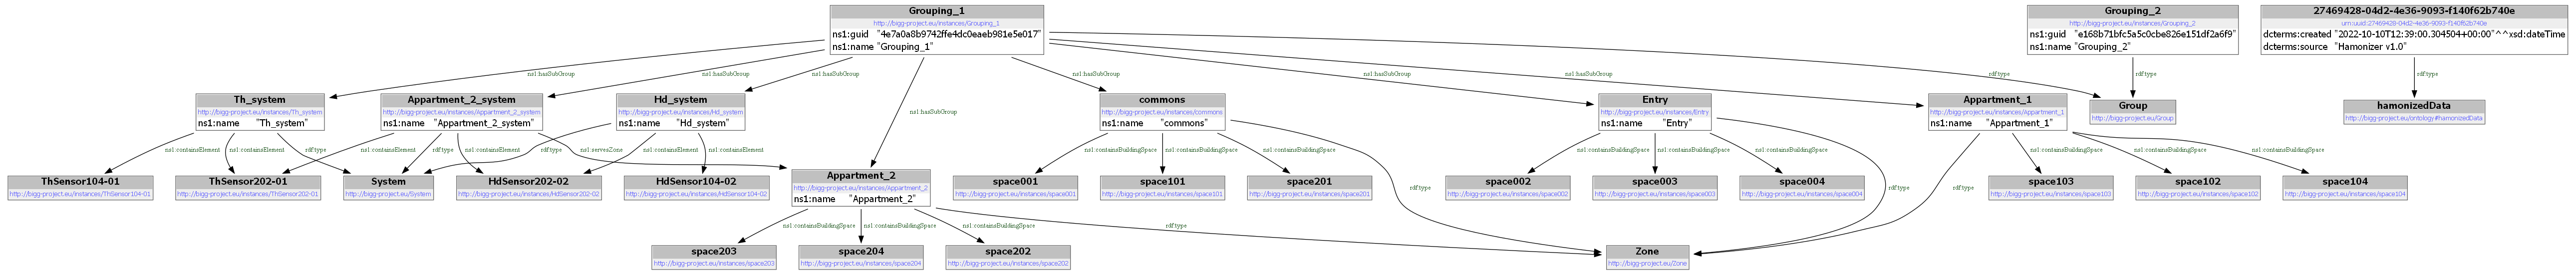

In [11]:
g = Graph()
g.parse(data=ttl, format="turtle")
visualize(g)